# Visualización de datos escalares en tres dimensiones

La mayoría de los enfoques de visualización 3D se clasifican en una de las siguientes categorías [1]:

- **Técnicas de corte:** Utilizando un plano de corte, se exploran los datos para extraer un corte
  bidimensional y, a continuación, se utilizan métodos de visualización espacial de datos bidimensionales.

- **Técnicas de isosuperficie:** Dado un valor especificado por el usuario, se genera una (o varias)
  descripciones de la superficie y se visualizan mediante técnicas de visualización de superficies.

- **Renderizado directo de volumen:** Se asigna una función de opacidad a los valores de los datos y
  se puede ver a través de ellos durante el renderizado.

In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipyvolume as ipv
from ipywidgets import interact
import pyvista as pv
from mayavi import mlab

In [3]:
plt.style.use("../img/matplotlib.mplstyle")
pv.set_jupyter_backend('trame')

In [4]:
# Datos de prueba para los orbitales de un átomo de hidrógeno
def hydrogen_wave(n=4, l=3, m=1,
                  limits=(-20, 20, -20, 20, -20, 20),
                  grid=(51, 51, 51)):
    """
    Calcula la función de onda para el átomo de hidrógeno.
    """
    from scipy.special import eval_genlaguerre, sph_harm, sph_harm_y, factorial
    from scipy import stats

    xmin, xmax, ymin, ymax, zmin, zmax = limits
    nx, ny, nz = grid
    X, Y, Z = np.mgrid[xmin:xmax:nx*1j,
                       ymin:ymax:ny*1j,
                       zmin:zmax:nz*1j]
    R = np.sqrt(X**2 + Y**2 + Z**2)
    Rmin = stats.scoreatpercentile(R.ravel(), 1)
    R[R < Rmin] = Rmin
    Phi = np.arccos(Z/R)
    Theta = np.arctan2(Y, X)
    Rho = 2*R/n
    norm = np.sqrt((2/n)**3 * factorial(n - l - 1)/(2*n*factorial(n + l)))
    Lag = eval_genlaguerre(n - l - 1, 2*l + 1, Rho)
    Sph = sph_harm(m, l, Theta, Phi)
    # Sph = sph_harm_y(m, l, Theta, Phi)
    wave = norm * np.exp(-0.5*Rho) * Rho**l * Lag * Sph

    return X, Y, Z, wave

In [5]:
X, Y, Z, wave = hydrogen_wave()
prob_density = np.real(np.conjugate(wave) * wave)
phase = np.angle(wave)

C:\Users\nguarinz\AppData\Local\Temp\ipykernel_14976\908092304.py:24: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Sph = sph_harm(m, l, Theta, Phi)


## Cortes

In [6]:

mlab.figure()
mlab.volume_slice(X, Y, Z, prob_density, colormap="viridis",
                  plane_orientation='z_axes')
mlab.outline()
mlab.show()


In [7]:
grid = pv.StructuredGrid(X, Y, Z)

In [8]:
slices = grid.slice_orthogonal(x=100, z=75)
#slices.plot()

## Isosuperficies

In [9]:
ipv.figure(1)
ipv.plot_isosurface(prob_density, color="blue",
                    extent=[[-20, 20],
                            [-20, 20],
                            [-20, 20]])
#ipv.save("hydrogen_isosurface.html") # Podemos guardar el contenedor html
ipv.show()

Container(children=[HBox(children=(FloatSlider(value=6.655914252758862e-06, max=6.48311119034796e-05, min=2.25…

Aunque Matplotlib (en sí mismo) no tiene la capacidad de hacer isosuperficies, podemos engañarla para que lo haga.

In [10]:
from skimage.measure import marching_cubes

In [11]:
verts, faces, _, _ = marching_cubes(prob_density, 3e-5, step_size=1)

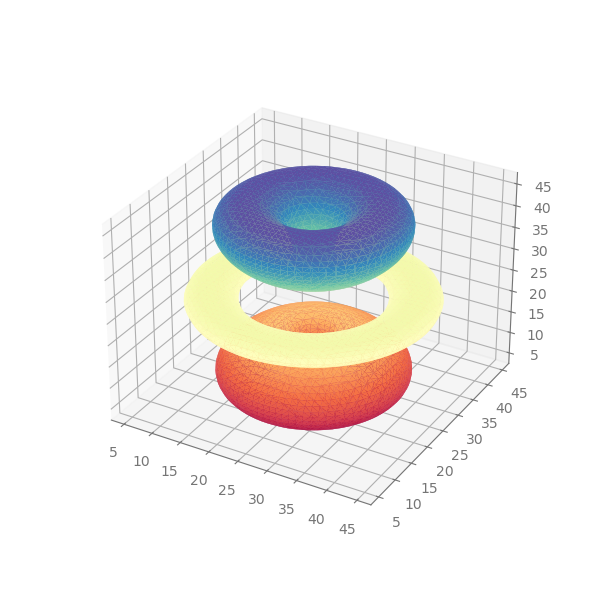

In [12]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show();

## Volume rendering

In [13]:
ipv.figure(2)
ipv.volshow(prob_density,
            extent=[[-20, 20], [-20, 20], [-20, 20]])
ipv.show()

C:\Users\nguarinz\AppData\Local\anaconda3\envs\scivis-2025\Lib\site-packages\ipyvolume\serialize.py:102: RuntimeWarning: invalid value encountered in cast
  subdata[..., i] = ((gradient[i][zindex] / 2.0 + 0.5) * 255).astype(np.uint8)


Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.1, max=1.0, step…

## Ejercicio

Queremos visualizar el conjunto de datos de una cabeza humana. Elija la técnica (y el paquete)
que considere adecuado. Los datos se encuentran en el archivo `../data/3d_exercise.npy`.
Puede cargarlo usando:

    data = np.load("../data/3d_exercise.npy")

Descomente la siguiente línea para ver la solución del ejercicio.

In [14]:
# %load ./snippets/3d_scalar_vis.py


Además, ``ipyvolume`` utiliza este conjunto de datos como ejemplo. En
[este enlace](https://ipyvolume.readthedocs.io/en/latest/_modules/ipyvolume/examples.html#head)
puede consultar el código utilizado. En particular, la creación del mapa de colores
para imitar los colores reales del conjunto de datos.

## Referencias

1. Matthew O. Ward, Georges Grinstein, Daniel Keim (2015). Interactive Data Visualization: Foundations, Techniques, and Applications. CRC Press.